# Problem Statement 1

## Importing Requried Lib.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Understanding the data

In [2]:
df= pd.read_csv('data.csv')

In [3]:
df.shape

(100, 3)

In [4]:
df.head()

,F,N,Prprice per square foot
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88


In [5]:
df.describe()

,F,N,Prprice per square foot
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


In [8]:
df["N"].value_counts()

0.23    4
0.62    3
0.69    3
0.40    3
0.64    3
       ..
0.04    1
0.44    1
0.93    1
0.60    1
0.80    1
Name: N, Length: 61, dtype: int64

## Checking Null Values

In [33]:
df.isnull().sum()

0    0
1    0
2    0
dtype: int64

Data has zero null values

## Checking Outliers

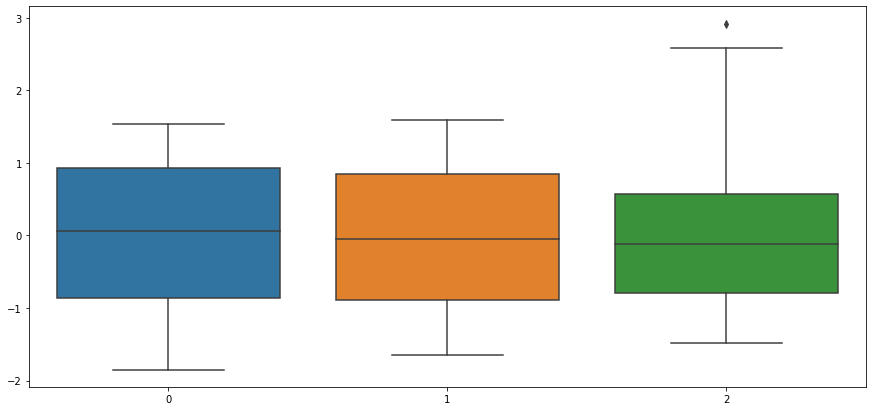

In [24]:
plt.figure(figsize=(15,7))
box_plot=sns.boxplot(data=df)
#box_plot.set_xticklabels(box_plot.get_xticklabels(),rotation = 60)

As per above box_polt no column has ouliers

## Preprocessing

Scaling the data

In [10]:
from sklearn.preprocessing import StandardScaler

In [12]:
scalar=StandardScaler()
scaled=scalar.fit_transform(df)

In [16]:
df=pd.DataFrame(scaled)

In [17]:
df.head()

,0,1,2
0,-0.377265,0.583471,-0.124647
1,1.503928,-0.889115,0.471350
2,0.990875,-0.692770,0.155381
3,-0.924521,-0.169184,-0.821290
4,-1.642794,1.074333,-0.764919


### Identifying dependant and independant variables

In [18]:
X=df.iloc[:,0:2].values
y=df.iloc[:,-1].values

### Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y , test_size=0.2 , random_state=7 )

In [25]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((80, 2), (20, 2), (80,), (20,))

## Multiple Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression 
reg=LinearRegression()
reg.fit(X_train,Y_train)


In [28]:
y_pred=reg.predict(X_test)

## Checking R_2 score of model

In [30]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)


0.9527345614637623

In [133]:
metrics.mean_squared_error(Y_test,y_pred)

0.06026963584247021

### As r_2 score is very close to 1 our model is prefectly build using Multiple Linear regression model.

In [31]:
reg.predict([[1.503928,0.889115]])

array([1.58562342])

In [32]:
reg.predict([[-1.642794,1.074333]])

array([-0.55238493])

## Using Polynomial regression

In [127]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=4)
lig_ploy=LinearRegression()
lig_ploy.fit(X_train,Y_train)

LinearRegression()

In [129]:
y_predict=lig_ploy.predict(X_test)

In [130]:
y_predict

array([-1.27362836, -0.40846515,  1.41748862,  0.7617318 , -1.24193001,
       -0.72231347, -0.89741863,  0.77730993, -1.43263286,  1.22003199,
        1.68613102,  0.3143363 , -0.23437572,  0.91241493, -0.51706776,
        1.46217201,  1.55518671,  0.11064841,  0.47022517,  0.98723885])

In [132]:
from sklearn import metrics
r2_score=metrics.r2_score(Y_test,y_predict)
r2_score


0.9527345614637623

In [134]:
metrics.mean_squared_error(Y_test,y_predict)

0.06026963584247021

### We get same output as we got using Linear regression model hence we can say both are good models to predict house prices

# Problem statement 2

### reading dataset

In [105]:
df2=pd.read_csv('exam.csv')

In [106]:
df2.head()

,ID,Age,Income,Gender,Marital Status,Buys
0,1,< 21,High,Male,Single,No
1,2,< 21,High,Male,Married,No
2,3,21 - 35,High,Male,Single,Yes
3,4,> 35,Medium,Male,Single,Yes
4,5,> 35,Low,Female,Single,Yes


In [107]:
df2['Buys'].value_counts()

Yes    9
No     5
Name: Buys, dtype: int64

In our dataset we have 9 buyers 

In [114]:
df24=df2.groupby(["Age"],as_index=False).agg(count=("Buys",'count'))
df24

,Age,count
0,21 - 35,4
1,< 21,5
2,> 35,5


C:\Users\adhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

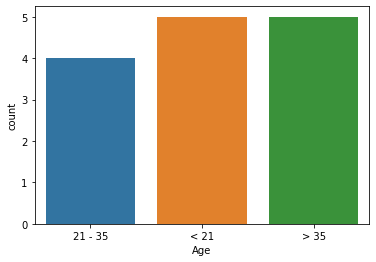

In [115]:
sns.barplot(df24["Age"],df24["count"],data=df24)

from above graph we can conclude that age>35 and age<25 having higher no. of buying lipstick

In [118]:
df34=df2.groupby(["Income"],as_index=False).agg(count_I=("Buys",'count'))
df34

,Income,count_I
0,High,4
1,Low,4
2,Medium,6


C:\Users\adhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income', ylabel='count_I'>

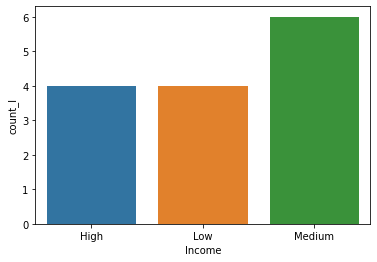

In [119]:
sns.barplot(df34["Income"],df34["count_I"],data=df34)

from above graph we can conclude that medium income having higher no. of buying lipstick

In [120]:
df44=df2.groupby(["Gender"],as_index=False).agg(count_G=("Buys",'count'))
df44

,Gender,count_G
0,Female,7
1,Male,7


C:\Users\adhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count_G'>

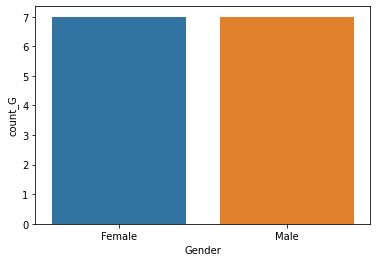

In [122]:
sns.barplot(df44["Gender"],df44["count_G"],data=df44)

In [125]:
df54=df2.groupby(["Marital Status"],as_index=False).agg(count_M=("Buys",'count'))
df54

,Marital Status,count_M
0,Married,7
1,Single,7


C:\Users\adhav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital Status', ylabel='count_M'>

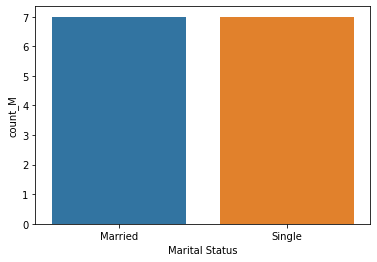

In [126]:
sns.barplot(df54["Marital Status"],df54["count_M"],data=df54)

### Lable Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = df2.select_dtypes(include='object').columns
for i in var_mod:
    df2[i] = le.fit_transform(df2[i])
    

In [44]:
df2.head()

,ID,Age,Income,Gender,Marital Status,Buys
0,1,1,0,1,1,0
1,2,1,0,1,0,0
2,3,0,0,1,1,1
3,4,2,2,1,1,1
4,5,2,1,0,1,1


age<21    == 1  , age 21-35 == 0 , age>35    == 2


 income High == 0  ,  income medium == 2  ,  income low == 1

Gender Male == 1  , Gender FeMale == 0

Marital Status Married == 0 ,  Marital Status Single == 1

Buying Yes == 1  ,  Buying No == 0

### Below we are traning the whole data and according to question's test data we are predicting the output

In [79]:
X_t=df2.drop(['Buys','ID'],axis=1)
y_t=df2.Buys

In [91]:
from sklearn.tree import DecisionTreeClassifier
dts=DecisionTreeClassifier(criterion='entropy')
dts.fit(X_t,y_t)

DecisionTreeClassifier(criterion='entropy')

### test data: [Age < 21, Income = Low, Gender = Female, Marital Status = Married]

In [135]:
dts.predict([[1,1,0,0]])

C:\Users\adhav\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

so from above given values we can predict that user is buying the lipstick

### Here we train our whole model as number of records are less and then we predict output using user input and we got correct predictions

### Root Node for Desicion tree is Age

# Using Test train split

In [93]:
X_t_train,X_t_test,Y_t_train,Y_t_test=train_test_split(X_t,y_t , test_size=0.35 , random_state=7)

In [95]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(X_t_train,Y_t_train)

DecisionTreeClassifier(criterion='entropy')

In [96]:
y_pred_dt=dt.predict(X_t_test)

In [136]:
dt.predict([[1,1,0,0]])

C:\Users\adhav\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

Here also we are getting output as buying the lipstick for test data

In [97]:
from sklearn.metrics import classification_report
print(classification_report(Y_t_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.50      0.33      0.40         3

    accuracy                           0.40         5
   macro avg       0.42      0.42      0.40         5
weighted avg       0.43      0.40      0.40         5



In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(Y_t_test,y_pred_dt)
cm

array([[1, 1],
       [2, 1]], dtype=int64)

### As we said above number of records are less so here we get the f1-score is 0.40 and our some predictions are wrong

In [101]:
n_nodes=dts.tree_.node_count
n_nodes

13

In [102]:
child_left=dts.tree_.children_left
child_left

array([ 1, -1,  3,  4, -1,  6, -1, -1,  9, -1, 11, -1, -1], dtype=int64)

In [104]:
child_feature=dts.tree_.feature
child_feature

array([ 0, -2,  2,  0, -2,  3, -2, -2,  0, -2,  3, -2, -2], dtype=int64)